<a href="https://colab.research.google.com/github/IrisMeng9/data_science/blob/main/w3_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [3]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [4]:
# change 'hour_beginning' to datetime and sort in ascending order
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df = df.sort_values(by='hour_beginning')
df.reset_index(drop=True, inplace=True)
df.head()

<ipython-input-4-49183976b030>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [ ]:
# extract time info in different formats
df['weekday'] = df['hour_beginning'].dt.day_name()
df['weekday_num'] = df['hour_beginning'].dt.weekday

In [ ]:
df_weekday = df[df['weekday_num'] < 5]
df_weekday.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday,weekday_num
24,2017-10-02 00:00:00,Brooklyn Bridge,60,20,40,clear-night,53.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,0
25,2017-10-02 01:00:00,Brooklyn Bridge,27,15,12,clear-night,52.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,0
26,2017-10-02 02:00:00,Brooklyn Bridge,6,3,3,clear-night,51.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,0
27,2017-10-02 03:00:00,Brooklyn Bridge,8,5,3,clear-night,50.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,0
28,2017-10-02 04:00:00,Brooklyn Bridge,2,0,2,clear-night,49.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,0


In [ ]:
# calculate the average pedestrians of each weekday
weekday_avg = df_weekday.groupby('weekday_num')['Pedestrians'].mean()
weekday_avg = weekday_avg.reset_index(drop=False)
weekday_avg['weekday'] = weekday_avg['weekday_num'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday'})
weekday_avg

,weekday_num,Pedestrians,weekday
0,0,642.983941,Monday
1,1,599.210911,Tuesday
2,2,574.956140,Wednesday
3,3,601.263158,Thursday
4,4,696.521053,Friday


In [9]:
import seaborn as sns

sns.lineplot(data=weekday_avg, x="weekday", y='Pedestrians')
plt.xlabel("Weekday")
plt.ylabel("Pedestrian Count")
plt.title('Average Number of Pedestrians for Each Weekday')
plt.grid(True)
plt.show()

NameError: name 'weekday_avg' is not defined

The graph shows a **V-shaped** trend in the average number of pedestrians throughout the weekdays. The count declines from Monday to Wednesday, reaching its lowest point midweek, before rising again from Thursday onward. The highest average is observed on Friday.

2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.



In [ ]:
# filter the data of year 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019]
df_2019.reset_index(drop=True, inplace=True)
df_2019.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday,weekday_num
0,2019-01-01 00:00:00,Brooklyn Bridge,144,24,120,rain,46.0,0.1363,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,1
1,2019-01-01 01:00:00,Brooklyn Bridge,39,20,19,rain,47.0,0.0490,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,1
2,2019-01-01 02:00:00,Brooklyn Bridge,15,10,5,rain,47.0,0.0279,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,1
3,2019-01-01 03:00:00,Brooklyn Bridge,14,10,4,cloudy,48.0,0.0044,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,1
4,2019-01-01 04:00:00,Brooklyn Bridge,8,6,2,cloudy,50.0,0.0003,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,1


In [ ]:
df_2019.tail()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday,weekday_num
8756,2019-12-31 19:00:00,Brooklyn Bridge,11,9,2,cloudy,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,1
8757,2019-12-31 20:00:00,Brooklyn Bridge,15,14,1,cloudy,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,1
8758,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,1
8759,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,1
8760,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,1


In [ ]:
df_2019.groupby('weather_summary')['Pedestrians'].agg(['mean', 'sum'])

,mean,sum
weather_summary,,
clear-day,1382.183298,1953025
clear-night,33.233871,61815
cloudy,543.225041,984867
fog,212.409091,4673
partly-cloudy-day,1574.093627,2790868
partly-cloudy-night,52.765922,63794
rain,229.822076,139502
sleet,178.250000,1426
snow,222.631579,8460


This table presents the average and total number of pedestrians for each type of weather. We observe that on **clear days** and **partly cloudy days**, the average pedestrian count exceeds 1,300. In contrast, **clear nights** have the lowest average with just 33 pedestrians, followed by **partly cloudy nights** with 52.

In [ ]:
df_2019_encode = pd.get_dummies(df_2019[['Pedestrians', 'weather_summary']], columns=['weather_summary'])
df_2019_encode.head()

,Pedestrians,weather_summary_clear-day,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
0,144,False,False,False,False,False,False,True,False,False,False
1,39,False,False,False,False,False,False,True,False,False,False
2,15,False,False,False,False,False,False,True,False,False,False
3,14,False,False,True,False,False,False,False,False,False,False
4,8,False,False,True,False,False,False,False,False,False,False


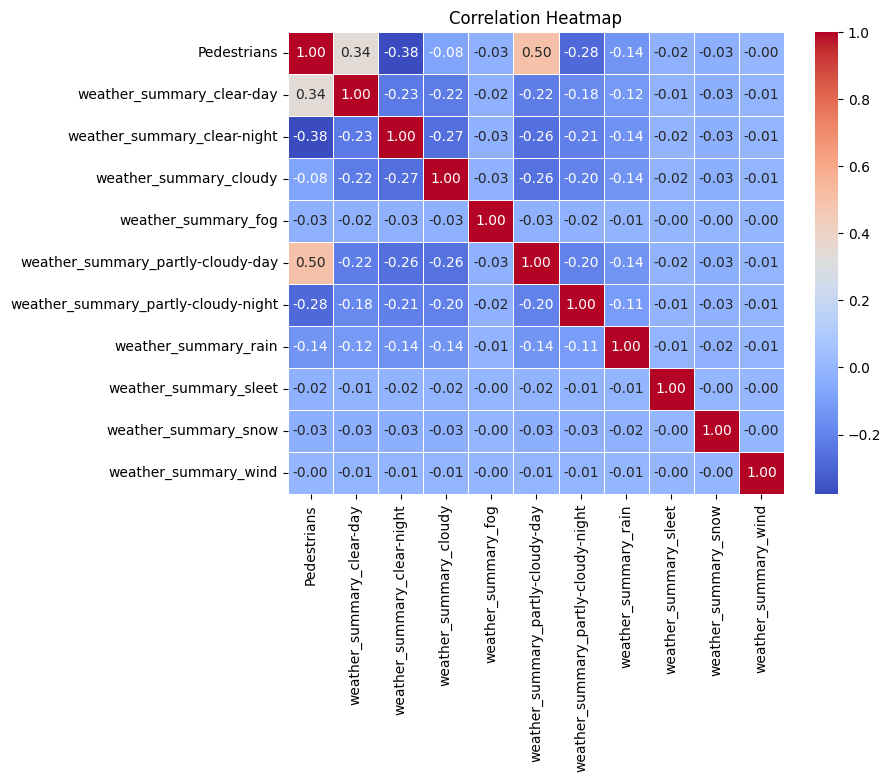

In [ ]:
df_corr = df_2019_encode.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

The heatmap illustrates the correlation between pedestrian count and weather type. **Partly cloudy days** show the highest correlation coefficient at **0.5**, indicating a tendency for more pedestrians on the Brooklyn Bridge during this weather. **Clear days** also exhibit a slight positive correlation of **0.34**.

In contrast, other weather types show a **negative correlation** with pedestrian count. This is particularly evident at night—whether **cloudy or clear**, fewer people are present, which is expected. **Rainy days** also show a negative correlation of **-0.14**, while other weather conditions have correlation coefficients close to zero.

3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

-Students can also show plots analyzing activity.

In [5]:
# label each time period
def time_category(df, col):
  hour = df[col].dt.hour
  df.loc[(hour >= 6) & (hour < 12), 'time_period'] = 'morning'
  df.loc[(hour >= 12) & (hour < 18), 'time_period'] = 'afternoon'
  df.loc[(hour >= 18) & (hour < 22), 'time_period'] = 'evening'
  df.loc[(hour >= 22) | (hour < 6), 'time_period'] = 'night'
  return df

df_time_period = time_category(df, 'hour_beginning')
df_time_period.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,time_period
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",night
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",night
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",night
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",night
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",night


In [6]:
pedestrian_stats = df_time_period.groupby('time_period')['Pedestrians'].mean()
print(pedestrian_stats)

time_period
afternoon    1694.841305
evening       596.591928
morning       614.543099
night          31.107230
Name: Pedestrians, dtype: float64


<ipython-input-68-53d785b31d14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pedestrian_stats.index, y=pedestrian_stats, palette='coolwarm')


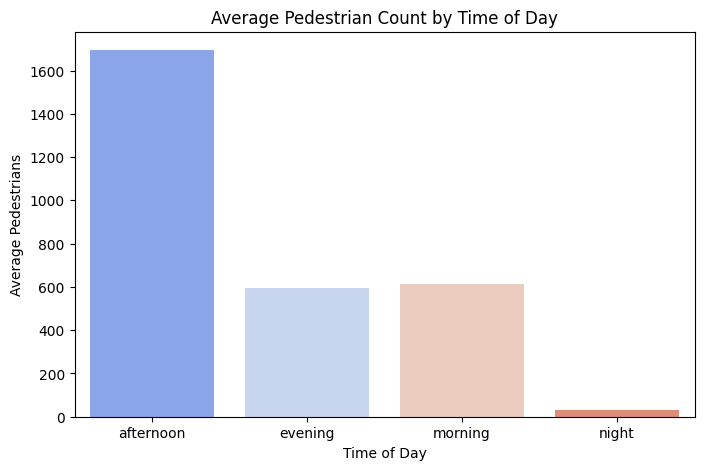

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=pedestrian_stats.index, y=pedestrian_stats, palette='coolwarm')

plt.title("Average Pedestrian Count by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Pedestrians")
plt.show()

The afternoon sees the highest average number of pedestrians, exceeding 1,600. In contrast, both morning and evening have similar pedestrian counts, averaging around 600. Nighttime has the lowest pedestrian activity, with an average of just 31.

<ipython-input-10-d13efc8196c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_time_period, x='time_period', y='Pedestrians', palette='coolwarm')


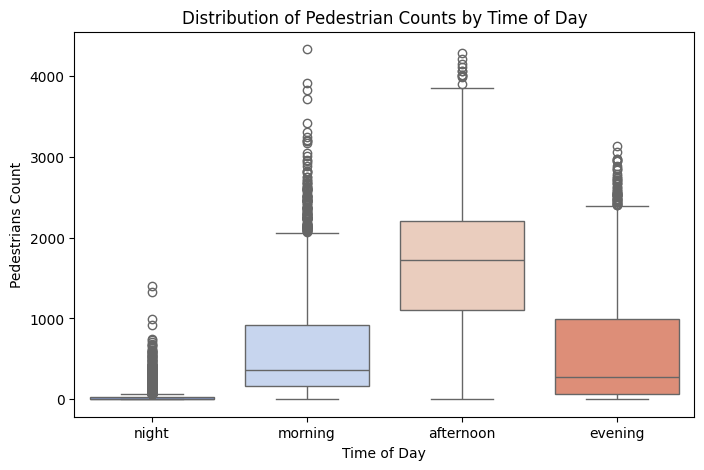

In [10]:
# boxplot of different periods
plt.figure(figsize=(8,5))
sns.boxplot(data=df_time_period, x='time_period', y='Pedestrians', palette='coolwarm')
plt.title("Distribution of Pedestrian Counts by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Pedestrians Count")
plt.show()

The afternoon has the highest median pedestrian count, along with the largest interquartile range (IQR), indicating greater variability in pedestrian flow.

Both morning and evening have similar medians, both of which are lower than that of the afternoon. Morning periods exhibit the widest range of outliers, which may be influenced by special events or weather conditions.